Back to the main [Index](../index.ipynb)

### Simple Example

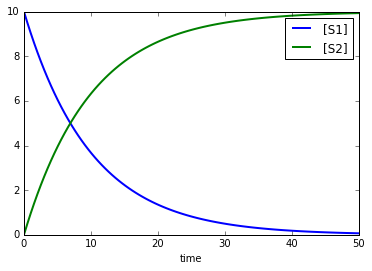

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [1]:
%matplotlib inline
from __future__ import print_function
import tellurium as te
r = te.loada('S1 -> S2; k1*S1; k1 = 0.1; S1 = 10')
r.simulate(0, 50, 100)
r.plot();

### More Complex Example
Stochastic simulation of a linear chain.

In [1]:
import tellurium as te
import numpy as np

r = te.loada('''
    J1: S1 -> S2;  k1*S1; 
    J2: S2 -> S3; k2*S2 - k3*S3
    # J2_1: S2 -> S3; k2*S2
    # J2_2: S3 -> S2; k3*S3;
    J3: S3 -> S4; k4*S3;

    k1 = 0.1; k2 = 0.5; k3 = 0.5; k4 = 0.5;
    S1 = 100;
''')

# set integrator, seed and selections for output
r.setIntegrator('gillespie')
r.setSeed(1234)
r.selections = ['time'] + r.getBoundarySpeciesIds() + r.getFloatingSpeciesIds()

# run repeated simulation
Ncol = len(r.selections)
Nsim = 30
points = 101
s_sum = np.zeros(shape=[points, Ncol])
for k in range(Nsim):
    r.resetToOrigin()
    s = r.simulate(0, 50, points)
    s_sum += s
    # no legend, do not show
    r.plot(s, show=False, loc=None, alpha=0.4, linewidth=1.0)
    
# add mean curve, legend, show everything and set labels, titels, ...
s_mean = s_sum/Nsim
r.plot(s_mean, loc='upper right', show=True, linewidth=3.0,
       title="Stochastic simulation", xlabel="time", ylabel="concentration", grid=True);